# Relatório de Análise - Identificando e Removendo Outliers

## Análise geral

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (8, 8))

In [ ]:
dados = pd.read_csv('aluguel_residencial.csv', sep = ';')

In [ ]:
dados.head(10)

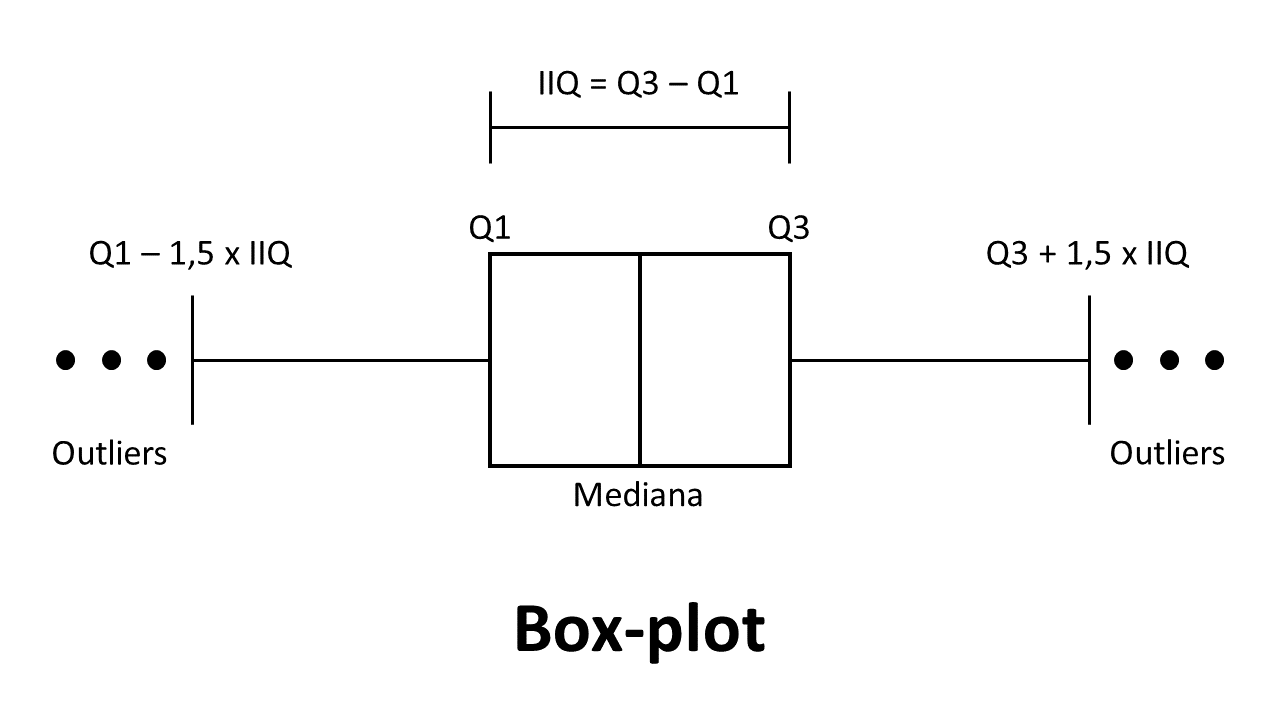

In [ ]:
dados.boxplot(['Valor'])

In [ ]:
valor = dados['Valor']
valor

In [ ]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior) #remocao de outliers menores que lim_inf & maiores que lim_sup
dados_new = dados[selecao]

In [ ]:
dados_new.boxplot(['Valor'])

In [ ]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

## Análise mais específica, removendo outliers valor em cada tipo

In [ ]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [ ]:
grupo_tipo = dados.groupby('Tipo')['Valor'] # o interesse eh no valor

In [ ]:
type(grupo_tipo)

In [ ]:
grupo_tipo.groups['Apartamento']

In [ ]:
grupo_tipo.groups['Casa']

In [ ]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [ ]:
Q1

In [ ]:
Q3

In [ ]:
IIQ

In [ ]:
limite_inferior

In [ ]:
limite_superior

In [ ]:
limite_superior['Casa']

In [ ]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [ ]:
dados_new.head(n=10)

In [ ]:
dados_new.to_csv('aluguel_residencial_sem_outliers.csv', sep = ';', index = False)